In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sys

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
train = pd.read_csv(r"C:\Users\windows 10\Downloads\Housing-project-train-data.csv")
test =pd.read_csv(r"C:\Users\windows 10\Downloads\Hosuing-project-test-data.csv")

In [4]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,289,20,RL,NaN,9819,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,122000
1164,554,20,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2009,WD,Normal,108000
1165,196,160,RL,24.0,2280,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,148500
1166,31,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal,40000


In [5]:
train.shape

(1168, 81)

In [6]:
train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [7]:
train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [8]:
train.nunique()

Id               1168
MSSubClass         15
MSZoning            5
LotFrontage       106
LotArea           892
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         581
Length: 81, dtype: int64

In [9]:
train.isnull().sum().sum()

6254

In [10]:
train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [11]:
train.shape

(1168, 81)

In [12]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.000000,954.00000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1161.000000,1168.000000,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,724.136130,56.767979,70.98847,10484.749144,6.104452,5.595890,1970.930651,1984.758562,102.310078,444.726027,...,96.206336,46.559932,23.015411,3.639555,15.051370,3.448630,47.315068,6.344178,2007.804795,181477.005993
std,416.159877,41.940650,24.82875,8957.442311,1.390153,1.124343,30.145255,20.785185,182.595606,462.664785,...,126.158988,66.381023,63.191089,29.088867,55.080816,44.896939,543.264432,2.686352,1.329738,79105.586863
min,1.000000,20.000000,21.00000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,360.500000,20.000000,60.00000,7621.500000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130375.000000
50%,714.500000,50.000000,70.00000,9522.500000,6.000000,5.000000,1972.000000,1993.000000,0.000000,385.500000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163995.000000
75%,1079.500000,70.000000,80.00000,11515.500000,7.000000,6.000000,2000.000000,2004.000000,160.000000,714.500000,...,171.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,1460.000000,190.000000,313.00000,164660.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

# Handling missing values

<Axes: >

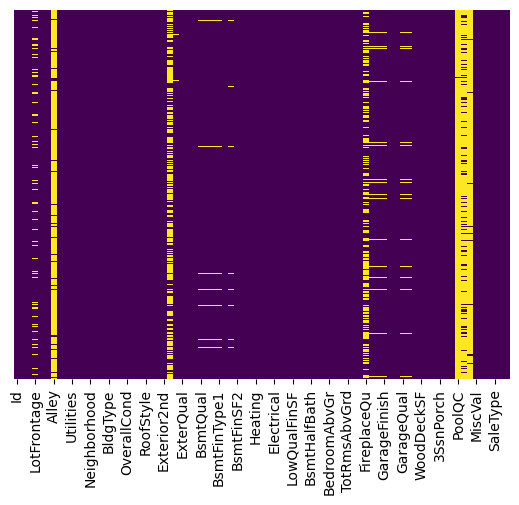

In [14]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [15]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [16]:
null_values = train.isnull().sum()
null_values

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [17]:
train= train.set_index("Id")

In [18]:
null_count = train.isnull().sum()
null_count


MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

In [19]:
null_percent =(train.isnull().sum()/train.shape[0])*100
null_percent

MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      18.321918
LotArea           0.000000
Street            0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 80, dtype: float64

In [20]:
for i in null_percent:
    
    print(i)

0.0
0.0
18.32191780821918
0.0
0.0
93.40753424657534
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
60.18835616438356
0.5993150684931506
0.0
0.0
0.0
2.5684931506849313
2.5684931506849313
2.654109589041096
2.5684931506849313
0.0
2.654109589041096
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
47.17465753424658
5.47945205479452
5.47945205479452
5.47945205479452
0.0
0.0
5.47945205479452
5.47945205479452
0.0
0.0
0.0
0.0
0.0
0.0
0.0
99.40068493150685
79.70890410958904
96.23287671232876
0.0
0.0
0.0
0.0
0.0
0.0


In [21]:
miss_value_50_perc = null_percent[null_percent > 50]

In [22]:
miss_value_50_perc

Alley          93.407534
MasVnrType     60.188356
PoolQC         99.400685
Fence          79.708904
MiscFeature    96.232877
dtype: float64

In [23]:
train['Alley'].value_counts()

Alley
Grvl    41
Pave    36
Name: count, dtype: int64

In [24]:
miss_values_20_50_perc = null_percent[(null_percent >20) & (null_percent <51)]
miss_values_20_50_perc

FireplaceQu    47.174658
dtype: float64

In [25]:
miss_values_5_20_perc = null_percent[(null_percent >5) & (null_percent <21)]
miss_values_5_20_perc

LotFrontage     18.321918
GarageType       5.479452
GarageYrBlt      5.479452
GarageFinish     5.479452
GarageQual       5.479452
GarageCond       5.479452
dtype: float64

### As per our domain knowledge we will not drop these features instead we will add a constant value

In [26]:
train['LotFrontage'].value_counts().head()

LotFrontage
60.0    111
80.0     60
70.0     58
75.0     46
50.0     44
Name: count, dtype: int64

<Axes: ylabel='Id'>

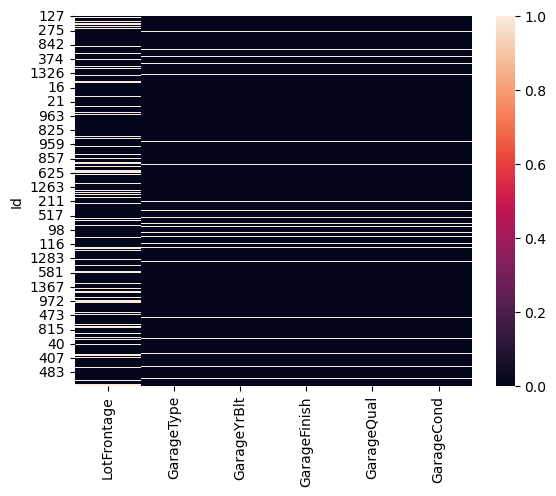

In [27]:
sns.heatmap(train[miss_values_5_20_perc.keys()].isnull())

## Classifing data in Categorical and numerical data

In [28]:
int_features = train.select_dtypes(include = ["int64"]).columns
print("Total no of integer features:",int_features.shape[0])
print("Integer feature names: ",int_features.tolist())

Total no of integer features: 34
Integer feature names:  ['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [29]:
float_features = train.select_dtypes(include = ['float64']).columns
print("Total no of floating features : ",float_features.shape[0])
print("Floating features names :",float_features.tolist())

Total no of floating features :  3
Floating features names : ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']


In [30]:
cat_features = train.select_dtypes(include = ['object']).columns
print("Total number of categorical features :",cat_features.shape[0])
print("Categorical feature names :",cat_features.tolist())

Total number of categorical features : 43
Categorical feature names : ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


# Missing Value Imputation

In [31]:
missing_value_feat = null_percent[null_percent > 0]
print("Total missing value features :",len(missing_value_feat))

Total missing value features : 18


In [32]:
missing_value_feat

LotFrontage     18.321918
Alley           93.407534
MasVnrType      60.188356
MasVnrArea       0.599315
BsmtQual         2.568493
BsmtCond         2.568493
BsmtExposure     2.654110
BsmtFinType1     2.568493
BsmtFinType2     2.654110
FireplaceQu     47.174658
GarageType       5.479452
GarageYrBlt      5.479452
GarageFinish     5.479452
GarageQual       5.479452
GarageCond       5.479452
PoolQC          99.400685
Fence           79.708904
MiscFeature     96.232877
dtype: float64

In [33]:
missing_value_feat[missing_value_feat.keys().isin(cat_features)]

Alley           93.407534
MasVnrType      60.188356
BsmtQual         2.568493
BsmtCond         2.568493
BsmtExposure     2.654110
BsmtFinType1     2.568493
BsmtFinType2     2.654110
FireplaceQu     47.174658
GarageType       5.479452
GarageFinish     5.479452
GarageQual       5.479452
GarageCond       5.479452
PoolQC          99.400685
Fence           79.708904
MiscFeature     96.232877
dtype: float64

In [34]:
cat_na_feat = missing_value_feat[missing_value_feat.keys().isin(cat_features)]
print("Total number of categorical missing features : ",len(cat_na_feat))
cat_na_feat

Total number of categorical missing features :  15


Alley           93.407534
MasVnrType      60.188356
BsmtQual         2.568493
BsmtCond         2.568493
BsmtExposure     2.654110
BsmtFinType1     2.568493
BsmtFinType2     2.654110
FireplaceQu     47.174658
GarageType       5.479452
GarageFinish     5.479452
GarageQual       5.479452
GarageCond       5.479452
PoolQC          99.400685
Fence           79.708904
MiscFeature     96.232877
dtype: float64

In [35]:
int_na_feat = missing_value_feat[missing_value_feat.keys().isin(int_features)]
print("Total number of integer missing features : ",len(int_na_feat))
int_na_feat

Total number of integer missing features :  0


Series([], dtype: float64)

In [36]:
float_na_feat = missing_value_feat[missing_value_feat.keys().isin(float_features)]
print("Total number of float missing features : ",len(float_na_feat))
float_na_feat

Total number of float missing features :  3


LotFrontage    18.321918
MasVnrArea      0.599315
GarageYrBlt     5.479452
dtype: float64

## Handling Alley = 93.407534

In [37]:
df_mvi = train.copy()
df_mvi.shape

(1168, 80)

In [38]:
alley_count = 'NA'
df_mvi['Alley'].replace(np.nan,alley_count,inplace = True)
df_mvi['Alley'].isnull().sum()

0

In [39]:
df_mvi['Alley'].value_counts()

Alley
NA      1091
Grvl      41
Pave      36
Name: count, dtype: int64

## Handling LotFrontage     18.321918


NameError: name 'LotFrontage' is not defined

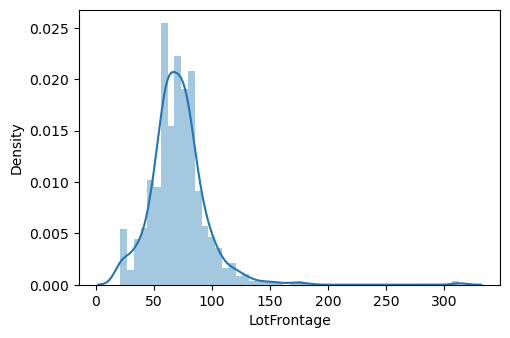

In [40]:
import matplotlib.pyplot as plt
plt.figure(figsize = (25,25))
plotnumber = 1
for column in df_mvi:
    if plotnumber<=24: # as there are 12 columns in data
        ax = plt.subplot(6,4,plotnumber)
        sns.distplot(df_mvi['LotFrontage'])
        plt.xlabel(LotFrontage,fontsize = 10)
    plotnumber+=1
plt.show()

In [41]:
lot_mean = train['LotFrontage'].mean()
df_mvi['LotFrontage'].replace(np.nan,lot_mean,inplace = True)
df_mvi['LotFrontage'].isnull().sum()

0

NameError: name 'LotFrontage' is not defined

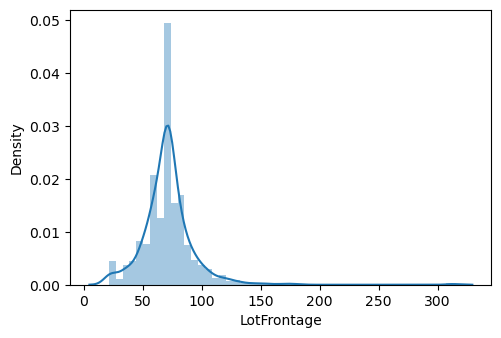

In [42]:
import matplotlib.pyplot as plt
plt.figure(figsize = (25,25))
plotnumber = 1
for column in df_mvi:
    if plotnumber<=24: # as there are 12 columns in data
        ax = plt.subplot(6,4,plotnumber)
        sns.distplot(df_mvi['LotFrontage'])
        plt.xlabel(LotFrontage,fontsize = 10)
    plotnumber+=1
plt.show()

## Handling MasVnrArea = 0.599315 and MasVnrType      60.188356

<Axes: ylabel='Id'>

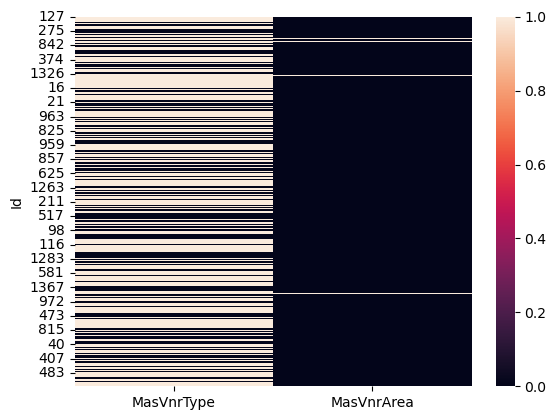

In [43]:
sns.heatmap(train[['MasVnrType','MasVnrArea']].isnull())

In [44]:
train["MasVnrType"].value_counts()

MasVnrType
BrkFace    354
Stone       98
BrkCmn      13
Name: count, dtype: int64

In [45]:
train["MasVnrType"].isnull().sum()

703

In [46]:
MasVnrType_mode = train["MasVnrType"].mode()[0]
df_mvi["MasVnrType"].replace(np.nan,MasVnrType_mode,inplace = True)
df_mvi["MasVnrType"].isnull().sum()

0

NameError: name 'MasVnrArea' is not defined

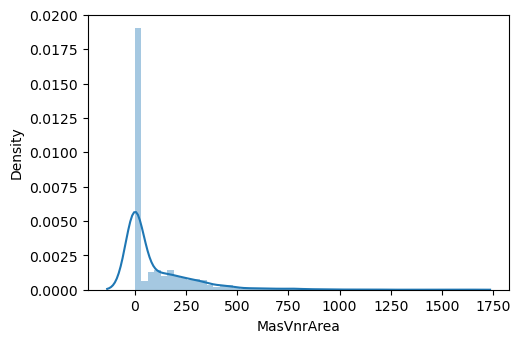

In [47]:
import matplotlib.pyplot as plt
plt.figure(figsize = (25,25))
plotnumber = 1
for column in df_mvi:
    if plotnumber<=24: # as there are 12 columns in data
        ax = plt.subplot(6,4,plotnumber)
        sns.distplot(df_mvi['MasVnrArea'])
        plt.xlabel(MasVnrArea,fontsize = 10)
    plotnumber+=1
plt.show()

In [48]:
MasVnrArea_const = 0
df_mvi["MasVnrArea"].replace(np.nan,MasVnrArea_const,inplace = True)
df_mvi["MasVnrArea"].isnull().sum()

0

In [49]:
bsmt_feat = ["BsmtQual","BsmtCond","BsmtExposure", "BsmtFinType1","BsmtFinType2"]  

<Axes: ylabel='Id'>

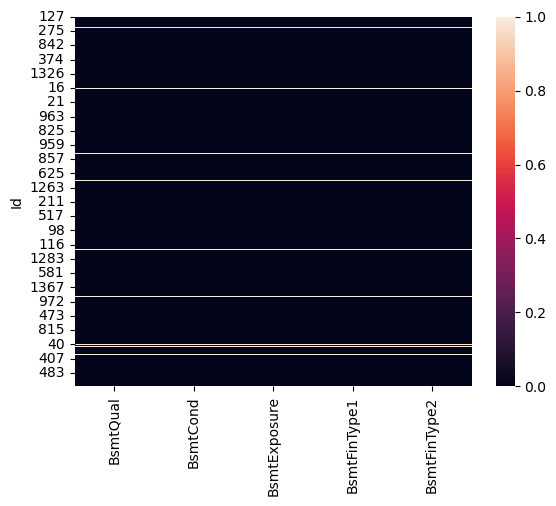

In [50]:
sns.heatmap(train[bsmt_feat].isnull())

In [51]:
for feat in bsmt_feat:
    print(f"Value counts of {feat}:{train[feat].value_counts()}")

Value counts of BsmtQual:BsmtQual
TA    517
Gd    498
Ex     94
Fa     29
Name: count, dtype: int64
Value counts of BsmtCond:BsmtCond
TA    1041
Gd      56
Fa      39
Po       2
Name: count, dtype: int64
Value counts of BsmtExposure:BsmtExposure
No    756
Av    180
Gd    108
Mn     93
Name: count, dtype: int64
Value counts of BsmtFinType1:BsmtFinType1
Unf    345
GLQ    330
ALQ    174
BLQ    121
Rec    109
LwQ     59
Name: count, dtype: int64
Value counts of BsmtFinType2:BsmtFinType2
Unf    1002
Rec      43
LwQ      40
BLQ      24
ALQ      16
GLQ      12
Name: count, dtype: int64


In [52]:
bsmt_count = "NA"
for feat in bsmt_feat:
    df_mvi[feat].replace(np.nan,bsmt_count,inplace = True)

In [53]:
df_mvi[ bsmt_feat].isnull().sum()

BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
dtype: int64

## Handling "FireplaceQu","PoolQC","Fence","MiscFeature"

In [54]:
other_cat_feat=["FireplaceQu","PoolQC","Fence","MiscFeature"]  
for feat in other_cat_feat:
        print(f"Value count of{feat}:{train[feat].value_counts()}")

Value count ofFireplaceQu:FireplaceQu
Gd    301
TA    252
Fa     25
Ex     21
Po     18
Name: count, dtype: int64
Value count ofPoolQC:PoolQC
Gd    3
Ex    2
Fa    2
Name: count, dtype: int64
Value count ofFence:Fence
MnPrv    129
GdPrv     51
GdWo      47
MnWw      10
Name: count, dtype: int64
Value count ofMiscFeature:MiscFeature
Shed    40
Gar2     2
TenC     1
Othr     1
Name: count, dtype: int64


In [55]:
FireplaceQu_count = "NA"
df_mvi["FireplaceQu"].replace(np.nan,FireplaceQu_count,inplace = True)
df_mvi["FireplaceQu"].isnull().sum()

0

In [56]:
PoolQC_count = "NA"
df_mvi["PoolQC"].replace(np.nan,PoolQC_count,inplace = True)
df_mvi["PoolQC"].isnull().sum()

0

In [57]:
Fence_count = "NA"
df_mvi["Fence"].replace(np.nan,Fence_count,inplace = True)
df_mvi["Fence"].isnull().sum()

0

In [58]:
MiscFeature_count= "NA"
df_mvi["MiscFeature"].replace(np.nan,MiscFeature_count,inplace = True)
df_mvi["MiscFeature"].isnull().sum()

0

## Handling Garage Values

In [59]:
cat_garage_feat=["GarageType","GarageYrBlt","GarageFinish","GarageQual","GarageCond"] 
num_garage_feat =["GarageYrBlt"]
df_garage_fea = train[cat_garage_feat+num_garage_feat ]
df_garage_fea[df_garage_fea.isnull().any(axis=1)]

,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,GarageYrBlt
Id,,,,,,
534,NaN,NaN,NaN,NaN,NaN,NaN
126,NaN,NaN,NaN,NaN,NaN,NaN
1327,NaN,NaN,NaN,NaN,NaN,NaN
141,NaN,NaN,NaN,NaN,NaN,NaN
149,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
1219,NaN,NaN,NaN,NaN,NaN,NaN
583,NaN,NaN,NaN,NaN,NaN,NaN
1284,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
garage_count = "NA"
for feat in cat_garage_feat:
    df_mvi[feat].replace(np.nan,garage_count ,inplace=True)
    
df_mvi[cat_garage_feat].isnull().sum()

GarageType      0
GarageYrBlt     0
GarageFinish    0
GarageQual      0
GarageCond      0
dtype: int64

In [61]:
garage_num = 0
for feat in num_garage_feat:
    df_mvi[feat].replace(np.nan,garage_num,inplace = True)
df_mvi[num_garage_feat].isnull().sum()

GarageYrBlt    0
dtype: int64

In [62]:
df_mvi.isnull().any(axis=1).sum()

0

# Feature Transformation
## Convert Numerical Feature to Categorical feature

In [63]:
for_num_conv = ['MSSubClass', 'YearBuilt', 'YearRemodAdd','MoSold', 'YrSold']
for feat in for_num_conv:
    print(f"{feat}: data types = {df_mvi[feat].dtypes}")

MSSubClass: data types = int64
YearBuilt: data types = int64
YearRemodAdd: data types = int64
MoSold: data types = int64
YrSold: data types = int64


In [64]:
df_mvi[for_num_conv].head()

,MSSubClass,YearBuilt,YearRemodAdd,MoSold,YrSold
Id,,,,,
127,120,1976,1976,2,2007
889,20,1970,1970,10,2007
793,60,1996,1997,6,2007
110,20,1977,1977,1,2010
422,20,1977,2000,6,2009


In [65]:
df_mvi["MoSold"].unique()

array([ 2, 10,  6,  1, 11,  5,  4,  7,  8,  3,  9, 12], dtype=int64)

In [66]:
import calendar
calendar.month_abbr[12]

'Dec'

In [67]:
df_mvi["MoSold"] = df_mvi["MoSold"].apply(lambda x:calendar.month_abbr[x])
df_mvi["MoSold"].unique()

array(['Feb', 'Oct', 'Jun', 'Jan', 'Nov', 'May', 'Apr', 'Jul', 'Aug',
       'Mar', 'Sep', 'Dec'], dtype=object)

In [68]:
for feat in for_num_conv:
    df_mvi[feat] =  df_mvi[feat].astype(str)

In [69]:
for feat in for_num_conv:
    print(f"{feat} : data type = {df_mvi[feat].dtype}")

MSSubClass : data type = object
YearBuilt : data type = object
YearRemodAdd : data type = object
MoSold : data type = object
YrSold : data type = object


# Ordinal Encoding

In [70]:
ord_enc_var=['ExterQual', 'ExterCond', 'BsmtQual','BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'HeatingQC', 'KitchenQual','FireplaceQu', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC','Functional', 'GarageFinish', 'Utilities']
print("Total number of features to do ordinal encoding :",len(ord_enc_var))

Total number of features to do ordinal encoding : 18


In [71]:
from pandas.api.types import CategoricalDtype

In [72]:
df_mvi["ExterQual"].value_counts()

ExterQual
TA    717
Gd    397
Ex     43
Fa     11
Name: count, dtype: int64

In [73]:
df_mvi['ExterQual'] = df_mvi['ExterQual'].astype(CategoricalDtype(categories = ["Po","Fa","TA","Gd","Ex"],ordered = True)).cat.codes

In [74]:
df_mvi["ExterQual"].value_counts()

ExterQual
2    717
3    397
4     43
1     11
Name: count, dtype: int64

In [75]:
df_mvi['ExterCond'] = df_mvi['ExterCond'].astype(CategoricalDtype(categories = ["Po","Fa","TA","Gd","Ex"],ordered = True)).cat.codes
df_mvi['BsmtQual'] = df_mvi['BsmtQual'].astype(CategoricalDtype(categories = ["NA","Po","Fa","TA","Gd","Ex"],ordered = True)).cat.codes
df_mvi['BsmtCond'] = df_mvi['BsmtCond'].astype(CategoricalDtype(categories = ["NA","Po","Fa","TA","Gd","Ex"],ordered = True)).cat.codes
df_mvi['BsmtExposure'] = df_mvi['BsmtExposure'].astype(CategoricalDtype(categories = ["NA","No","Mn","Av","Gd"],ordered = True)).cat.codes
df_mvi[ 'BsmtFinType1'] = df_mvi[ 'BsmtFinType1'].astype(CategoricalDtype(categories = ["NA","Unf","LwQ","Rec","BLQ","ALQ","GLQ"],ordered = True)).cat.codes
df_mvi[ 'BsmtFinType2'] = df_mvi[ 'BsmtFinType2'].astype(CategoricalDtype(categories = ["NA","Unf","LwQ","Rec","BLQ","ALQ","GLQ"],ordered = True)).cat.codes
df_mvi[ 'HeatingQC'] = df_mvi[ 'HeatingQC'].astype(CategoricalDtype(categories = ["Po","Fa","TA","Gd","Ex"],ordered = True)).cat.codes
df_mvi['KitchenQual'] = df_mvi['KitchenQual'].astype(CategoricalDtype(categories = ["Po","Fa","TA","Gd","Ex"],ordered = True)).cat.codes
df_mvi['FireplaceQu'] = df_mvi['FireplaceQu'].astype(CategoricalDtype(categories = ["NA","Po","Fa","TA","Gd","Ex"],ordered = True)).cat.codes
df_mvi[ 'GarageQual'] = df_mvi[ 'GarageQual'].astype(CategoricalDtype(categories = ["NA","Po","Fa","TA","Gd","Ex"],ordered = True)).cat.codes
df_mvi['GarageCond'] = df_mvi['GarageCond'].astype(CategoricalDtype(categories = ["NA","Po","Fa","TA","Gd","Ex"],ordered = True)).cat.codes
df_mvi[ 'PoolQC'] = df_mvi[ 'PoolQC'].astype(CategoricalDtype(categories = ["NA","Fa","TA","Gd","Ex"],ordered = True)).cat.codes
df_mvi['Functional'] = df_mvi['Functional'].astype(CategoricalDtype(categories = ["Sal","Sev","Maj2","Maj1","Mod","Min2","Min1","Typ"],ordered = True)).cat.codes
df_mvi['GarageFinish'] = df_mvi['GarageFinish'].astype(CategoricalDtype(categories = ["NA","Unf","Rfn","Fin"],ordered = True)).cat.codes
df_mvi['PavedDrive'] = df_mvi['PavedDrive'].astype(CategoricalDtype(categories = ["N","P","Y"],ordered = True)).cat.codes
df_mvi['Utilities'] = df_mvi['Utilities'].astype(CategoricalDtype(categories = ["ELO","NASeWa","NASeWr","AllPub"],ordered = True)).cat.codes


In [76]:
df_mvi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1168 entries, 127 to 617
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1168 non-null   object 
 1   MSZoning       1168 non-null   object 
 2   LotFrontage    1168 non-null   float64
 3   LotArea        1168 non-null   int64  
 4   Street         1168 non-null   object 
 5   Alley          1168 non-null   object 
 6   LotShape       1168 non-null   object 
 7   LandContour    1168 non-null   object 
 8   Utilities      1168 non-null   int8   
 9   LotConfig      1168 non-null   object 
 10  LandSlope      1168 non-null   object 
 11  Neighborhood   1168 non-null   object 
 12  Condition1     1168 non-null   object 
 13  Condition2     1168 non-null   object 
 14  BldgType       1168 non-null   object 
 15  HouseStyle     1168 non-null   object 
 16  OverallQual    1168 non-null   int64  
 17  OverallCond    1168 non-null   int64  
 18  YearBuilt   

# One Hot Encoding for Nominal Data

In [77]:
df_encod = df_mvi.copy()
obj_feat = df_encod.select_dtypes(include = "object").columns.tolist()
print("Object type features : ",len(obj_feat))
print("Features : \n",obj_feat)

Object type features :  32
Features : 
 ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'Electrical', 'GarageType', 'GarageYrBlt', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']


In [78]:
df_encod.shape

(1168, 80)

In [79]:
df_encod[obj_feat].head(2)

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,CentralAir,Electrical,GarageType,GarageYrBlt,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
127,120,RL,Pave,NA,IR1,Lvl,Inside,Gtl,NPkVill,Norm,...,Y,SBrkr,Attchd,1977.0,NA,NA,Feb,2007,WD,Normal
889,20,RL,Pave,NA,IR1,Lvl,Inside,Mod,NAmes,Norm,...,Y,SBrkr,Attchd,1970.0,NA,NA,Oct,2007,WD,Normal


In [80]:
df_encod = pd.get_dummies(df_encod,columns = obj_feat,prefix  = obj_feat,drop_first=True)

In [81]:
df_encod.shape

(1168, 495)

In [82]:
df_encod.head(2)

,LotFrontage,LotArea,Utilities,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
127,70.98847,4928,3,6,5,0.0,2,2,4,3,...,False,False,False,False,True,False,False,False,True,False
889,95.00000,15865,3,8,6,0.0,3,3,3,4,...,False,False,False,False,True,False,False,False,True,False


In [83]:
df_encod.select_dtypes(include = "object").columns.tolist()

[]

# Data Normalization

In [84]:
x= df_encod.drop(columns = [ 'SalePrice'],axis = 1)
y= df_encod['SalePrice']


In [85]:
X = x

In [86]:
feature = ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice']
from sklearn.preprocessing import power_transform
X = power_transform(X,method = 'yeo-johnson')
X = pd.DataFrame(X,columns = x.columns)

In [87]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X)
# z=(x-u)/sc

X_scaled = sc.fit_transform(X)
X = pd.DataFrame(X_scaled,columns = X.columns)

In [88]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['vif']=[variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif['Features'] = X.columns
vif

,vif,Features
0,4.482640,LotFrontage
1,8.295526,LotArea
2,NaN,Utilities
3,8.679072,OverallQual
4,4.386554,OverallCond
...,...,...
489,3.350747,SaleCondition_AdjLand
490,3.632568,SaleCondition_Alloca
491,2.061688,SaleCondition_Family
492,5.355244,SaleCondition_Normal


In [89]:
from sklearn.decomposition import PCA
for i in range(2,19):
    pca = PCA(n_components = i)
    principalComponents = pca.fit_transform(X)
    print(i,sum(pca.explained_variance_ratio_))

2 0.050562153811751
3 0.0648135955711844
4 0.07745467392266875
5 0.08826401582977636
6 0.09836519136185076
7 0.10747323692605062
8 0.11604755657473378
9 0.12428168945052843
10 0.13207176688163672
11 0.1394791297799082
12 0.14698483079484026
13 0.1542069069830788
14 0.16140048052242403
15 0.16803621896056425
16 0.1748596532359003
17 0.18167046216305824
18 0.18846844333591778


In [90]:
pca = PCA(n_components=13)
principalComponents = pca.fit_transform(X)
X = pd.DataFrame(principalComponents)

In [91]:
X

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.574437,2.819979,-0.880047,2.843009,2.858454,-3.449241,-0.767504,1.776099,3.998990,7.540185,-2.632981,-0.978358,-0.517313
1,2.630996,4.575969,1.091524,-1.697443,-3.412718,-3.353057,3.431131,1.696024,2.737252,-1.708662,3.709370,-3.059576,-0.620082
2,3.346724,-0.262255,4.320063,1.722976,-0.448037,2.183202,1.977887,1.344116,-1.618545,-1.037877,1.525969,-0.549735,2.152688
3,1.078884,4.980014,0.349810,-1.381452,2.218374,-2.935543,-0.230530,-0.012327,2.982371,4.933433,-2.792977,-1.343345,0.111853
4,2.390705,2.990972,-0.618286,-0.133398,0.975767,-3.271938,0.433576,0.005152,3.153204,0.949853,-0.973195,-2.087819,-1.658699
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,-3.927603,2.747049,-1.826889,1.164026,0.334401,-0.223933,-2.463743,0.024649,-0.803733,-1.979373,-0.649051,-0.601136,0.692736
1164,-3.782278,-1.408859,-1.259177,-1.114105,2.779218,3.805564,-3.482483,-0.074998,1.518803,-0.311014,-1.385799,0.715282,-0.871860
1165,-0.989453,0.248476,1.124811,7.374262,3.893387,-6.259531,-2.055411,-0.362527,4.471945,8.300525,-0.561746,-2.236299,-1.175990
1166,-6.251503,-5.463804,1.982699,-2.163601,-1.397326,-1.380221,-0.929669,-1.051651,-0.072046,0.730515,-0.534287,0.661097,0.749363


# Model Training

In [92]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split

In [93]:
for i in range(0,1000):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state = i)
    lr.fit(x_train,y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,1):
        print("At random state",i,"model perform very well")
        print("At random state",i)
        print("Training accuracy score is",r2_score(y_train,pred_train)*100)
        print("Testing accuracy score is ",r2_score(y_test,pred_test)*100)

At random state 0 model perform very well
At random state 0
Training accuracy score is 95.4461139686194
Testing accuracy score is  38.50764814922598
At random state 1 model perform very well
At random state 1
Training accuracy score is 94.8113829237322
Testing accuracy score is  -56738811.728205115
At random state 2 model perform very well
At random state 2
Training accuracy score is 95.38851430206773
Testing accuracy score is  -2.423167928404113
At random state 3 model perform very well
At random state 3
Training accuracy score is 94.5234222527375
Testing accuracy score is  70.50203558940349
At random state 4 model perform very well
At random state 4
Training accuracy score is 95.14064135379124
Testing accuracy score is  42.45400504300343
At random state 5 model perform very well
At random state 5
Training accuracy score is 94.97233767376963
Testing accuracy score is  48.60460674266622
At random state 6 model perform very well
At random state 6
Training accuracy score is 95.6723597386

At random state 54 model perform very well
At random state 54
Training accuracy score is 95.25566058709667
Testing accuracy score is  72.23699124972876
At random state 55 model perform very well
At random state 55
Training accuracy score is 95.8743880387467
Testing accuracy score is  -29015663.880409054
At random state 56 model perform very well
At random state 56
Training accuracy score is 95.68049321560962
Testing accuracy score is  -5.953689925585803
At random state 57 model perform very well
At random state 57
Training accuracy score is 94.36443683423357
Testing accuracy score is  70.70199309543352
At random state 58 model perform very well
At random state 58
Training accuracy score is 94.45327677271344
Testing accuracy score is  66.84191933996608
At random state 59 model perform very well
At random state 59
Training accuracy score is 94.57324639675352
Testing accuracy score is  51.88086639512952
At random state 60 model perform very well
At random state 60
Training accuracy score 

At random state 109 model perform very well
At random state 109
Training accuracy score is 95.30080893673679
Testing accuracy score is  21.77688625021189
At random state 110 model perform very well
At random state 110
Training accuracy score is 95.58299821056293
Testing accuracy score is  -157190198.20449454
At random state 111 model perform very well
At random state 111
Training accuracy score is 94.99685425669692
Testing accuracy score is  65.8289994521587
At random state 112 model perform very well
At random state 112
Training accuracy score is 95.33752939188156
Testing accuracy score is  61.225191009178815
At random state 113 model perform very well
At random state 113
Training accuracy score is 94.48554177391631
Testing accuracy score is  23.81538824564382
At random state 114 model perform very well
At random state 114
Training accuracy score is 94.83811441968577
Testing accuracy score is  -1681401561.2404115
At random state 115 model perform very well
At random state 115
Training

At random state 163 model perform very well
At random state 163
Training accuracy score is 95.59373161554245
Testing accuracy score is  -0.11133387917383608
At random state 164 model perform very well
At random state 164
Training accuracy score is 94.47529203438829
Testing accuracy score is  62.63457689646306
At random state 165 model perform very well
At random state 165
Training accuracy score is 94.57315950681267
Testing accuracy score is  70.68697734467729
At random state 166 model perform very well
At random state 166
Training accuracy score is 94.33614400185269
Testing accuracy score is  46.680893679999755
At random state 167 model perform very well
At random state 167
Training accuracy score is 93.89225958256105
Testing accuracy score is  -115374923.86831963
At random state 168 model perform very well
At random state 168
Training accuracy score is 95.52856793877136
Testing accuracy score is  35.7431659277864
At random state 169 model perform very well
At random state 169
Trainin

At random state 217 model perform very well
At random state 217
Training accuracy score is 94.19017692182403
Testing accuracy score is  -107839925.77433202
At random state 218 model perform very well
At random state 218
Training accuracy score is 95.1130209087616
Testing accuracy score is  -3091486.317535002
At random state 219 model perform very well
At random state 219
Training accuracy score is 94.58419460261078
Testing accuracy score is  -90402181.23380767
At random state 220 model perform very well
At random state 220
Training accuracy score is 95.86561854599344
Testing accuracy score is  -28940253.44016349
At random state 221 model perform very well
At random state 221
Training accuracy score is 95.57129340050132
Testing accuracy score is  -3118479.2216730057
At random state 222 model perform very well
At random state 222
Training accuracy score is 95.05366804955769
Testing accuracy score is  75.62200718846827
At random state 223 model perform very well
At random state 223
Traini

At random state 271 model perform very well
At random state 271
Training accuracy score is 94.66559084992267
Testing accuracy score is  -2753153644.3529544
At random state 272 model perform very well
At random state 272
Training accuracy score is 95.86086937889239
Testing accuracy score is  26.52109655650139
At random state 273 model perform very well
At random state 273
Training accuracy score is 94.1902881028578
Testing accuracy score is  46.02959848918089
At random state 274 model perform very well
At random state 274
Training accuracy score is 95.36662974727753
Testing accuracy score is  -42548826.336523026
At random state 275 model perform very well
At random state 275
Training accuracy score is 95.46842881474318
Testing accuracy score is  -8.880823290993378
At random state 276 model perform very well
At random state 276
Training accuracy score is 95.00428376951733
Testing accuracy score is  66.62056815283434
At random state 277 model perform very well
At random state 277
Training

At random state 326 model perform very well
At random state 326
Training accuracy score is 94.96586738902431
Testing accuracy score is  70.69053738335525
At random state 327 model perform very well
At random state 327
Training accuracy score is 95.17877724493259
Testing accuracy score is  -21520756.016379695
At random state 328 model perform very well
At random state 328
Training accuracy score is 94.24177492033226
Testing accuracy score is  73.5576437827311
At random state 329 model perform very well
At random state 329
Training accuracy score is 95.48648151573525
Testing accuracy score is  66.92496713566445
At random state 330 model perform very well
At random state 330
Training accuracy score is 94.64983843195816
Testing accuracy score is  76.18299782931817
At random state 331 model perform very well
At random state 331
Training accuracy score is 94.45556708860235
Testing accuracy score is  -1706571685.1078959
At random state 332 model perform very well
At random state 332
Training 

Training accuracy score is 94.94206102843425
Testing accuracy score is  75.13666882016359
At random state 380 model perform very well
At random state 380
Training accuracy score is 95.78185844104782
Testing accuracy score is  26.005732963538474
At random state 381 model perform very well
At random state 381
Training accuracy score is 94.64913584044623
Testing accuracy score is  3.7579515709207367
At random state 382 model perform very well
At random state 382
Training accuracy score is 95.51564352777018
Testing accuracy score is  69.73242143609575
At random state 383 model perform very well
At random state 383
Training accuracy score is 94.45189164051627
Testing accuracy score is  27.05685353360938
At random state 384 model perform very well
At random state 384
Training accuracy score is 96.09610773996076
Testing accuracy score is  61.249399954608606
At random state 385 model perform very well
At random state 385
Training accuracy score is 94.83502528864653
Testing accuracy score is  -

At random state 434 model perform very well
At random state 434
Training accuracy score is 95.8701686635691
Testing accuracy score is  -3.8523307729739553
At random state 435 model perform very well
At random state 435
Training accuracy score is 95.50487322532305
Testing accuracy score is  -2167169582.867771
At random state 436 model perform very well
At random state 436
Training accuracy score is 95.80777743285361
Testing accuracy score is  43.22275041677634
At random state 437 model perform very well
At random state 437
Training accuracy score is 94.4570268090194
Testing accuracy score is  79.03859140478673
At random state 438 model perform very well
At random state 438
Training accuracy score is 95.85794987067527
Testing accuracy score is  56.28087880274837
At random state 439 model perform very well
At random state 439
Training accuracy score is 95.44773212184346
Testing accuracy score is  46.87479215700496
At random state 440 model perform very well
At random state 440
Training ac

At random state 488 model perform very well
At random state 488
Training accuracy score is 94.20647468567951
Testing accuracy score is  75.6239200166776
At random state 489 model perform very well
At random state 489
Training accuracy score is 94.83946021129194
Testing accuracy score is  20.907307523886786
At random state 490 model perform very well
At random state 490
Training accuracy score is 95.84634274455875
Testing accuracy score is  -90585874.31892143
At random state 491 model perform very well
At random state 491
Training accuracy score is 94.68923059712864
Testing accuracy score is  -4928660049.712078
At random state 492 model perform very well
At random state 492
Training accuracy score is 94.62994736485567
Testing accuracy score is  75.30881622678638
At random state 493 model perform very well
At random state 493
Training accuracy score is 94.99350060953627
Testing accuracy score is  78.75520241873272
At random state 494 model perform very well
At random state 494
Training a

At random state 542 model perform very well
At random state 542
Training accuracy score is 95.29260235083531
Testing accuracy score is  -18821555183.85137
At random state 543 model perform very well
At random state 543
Training accuracy score is 94.52211482726706
Testing accuracy score is  73.38061533197747
At random state 544 model perform very well
At random state 544
Training accuracy score is 94.22402599497653
Testing accuracy score is  37.34349361820337
At random state 545 model perform very well
At random state 545
Training accuracy score is 94.07694835218429
Testing accuracy score is  39.267745959876066
At random state 546 model perform very well
At random state 546
Training accuracy score is 94.67631060960724
Testing accuracy score is  -934196706.8805512
At random state 547 model perform very well
At random state 547
Training accuracy score is 94.86642212337705
Testing accuracy score is  36.02291304079613
At random state 548 model perform very well
At random state 548
Training 

At random state 596 model perform very well
At random state 596
Training accuracy score is 94.70278364745683
Testing accuracy score is  40.44224423618894
At random state 597 model perform very well
At random state 597
Training accuracy score is 95.27576406141797
Testing accuracy score is  60.79088708905381
At random state 598 model perform very well
At random state 598
Training accuracy score is 94.083774428119
Testing accuracy score is  -951398600.6247761
At random state 599 model perform very well
At random state 599
Training accuracy score is 95.65106588963941
Testing accuracy score is  -18998529.665016145
At random state 600 model perform very well
At random state 600
Training accuracy score is 95.81226356825512
Testing accuracy score is  63.22092542819499
At random state 601 model perform very well
At random state 601
Training accuracy score is 94.85184226534068
Testing accuracy score is  -2680953.851850393
At random state 602 model perform very well
At random state 602
Training a

At random state 651 model perform very well
At random state 651
Training accuracy score is 94.26624525928919
Testing accuracy score is  45.09869879681069
At random state 652 model perform very well
At random state 652
Training accuracy score is 93.93312584273512
Testing accuracy score is  66.64588435646894
At random state 653 model perform very well
At random state 653
Training accuracy score is 94.69088870619993
Testing accuracy score is  42.65683552206473
At random state 654 model perform very well
At random state 654
Training accuracy score is 94.2813113596079
Testing accuracy score is  79.35804954171903
At random state 655 model perform very well
At random state 655
Training accuracy score is 95.73810421836141
Testing accuracy score is  -12.633710126711396
At random state 656 model perform very well
At random state 656
Training accuracy score is 95.82731737154847
Testing accuracy score is  51.007245724565585
At random state 657 model perform very well
At random state 657
Training a

At random state 705 model perform very well
At random state 705
Training accuracy score is 94.28508195461508
Testing accuracy score is  22.02650094905928
At random state 706 model perform very well
At random state 706
Training accuracy score is 94.84548171345534
Testing accuracy score is  -2267254.2232345445
At random state 707 model perform very well
At random state 707
Training accuracy score is 95.40914261774611
Testing accuracy score is  2.936581383117298
At random state 708 model perform very well
At random state 708
Training accuracy score is 95.643110831091
Testing accuracy score is  63.52764552514096
At random state 709 model perform very well
At random state 709
Training accuracy score is 95.18702973646856
Testing accuracy score is  -1655119310.5934958
At random state 710 model perform very well
At random state 710
Training accuracy score is 94.85649664775781
Testing accuracy score is  10.846779052492096
At random state 711 model perform very well
At random state 711
Training 

At random state 759 model perform very well
At random state 759
Training accuracy score is 95.1269746401703
Testing accuracy score is  56.16245696954238
At random state 760 model perform very well
At random state 760
Training accuracy score is 94.36848658669078
Testing accuracy score is  77.46000475600238
At random state 761 model perform very well
At random state 761
Training accuracy score is 94.39022519614724
Testing accuracy score is  76.93796832658806
At random state 762 model perform very well
At random state 762
Training accuracy score is 94.75617676355812
Testing accuracy score is  10.898894412819072
At random state 763 model perform very well
At random state 763
Training accuracy score is 94.75719109063083
Testing accuracy score is  77.7212312640859
At random state 764 model perform very well
At random state 764
Training accuracy score is 94.33885086672842
Testing accuracy score is  47.781422487844836
At random state 765 model perform very well
At random state 765
Training acc

At random state 814 model perform very well
At random state 814
Training accuracy score is 95.26656376268349
Testing accuracy score is  70.33891273943583
At random state 815 model perform very well
At random state 815
Training accuracy score is 95.81605585120336
Testing accuracy score is  21.62253768579815
At random state 816 model perform very well
At random state 816
Training accuracy score is 95.19387042516658
Testing accuracy score is  -492487618.20384616
At random state 817 model perform very well
At random state 817
Training accuracy score is 94.69892653357803
Testing accuracy score is  -6627923.199220562
At random state 818 model perform very well
At random state 818
Training accuracy score is 94.97119426318825
Testing accuracy score is  -156956133.27034965
At random state 819 model perform very well
At random state 819
Training accuracy score is 94.94381110842784
Testing accuracy score is  28.25294264723689
At random state 820 model perform very well
At random state 820
Trainin

At random state 868 model perform very well
At random state 868
Training accuracy score is 95.55603397151754
Testing accuracy score is  57.205506018071326
At random state 869 model perform very well
At random state 869
Training accuracy score is 94.68864826118568
Testing accuracy score is  36.14671664503059
At random state 870 model perform very well
At random state 870
Training accuracy score is 94.74587746425726
Testing accuracy score is  -33.81381998369668
At random state 871 model perform very well
At random state 871
Training accuracy score is 95.3792742671293
Testing accuracy score is  -41.436466845434026
At random state 872 model perform very well
At random state 872
Training accuracy score is 95.3339956554208
Testing accuracy score is  65.94509018876451
At random state 873 model perform very well
At random state 873
Training accuracy score is 94.49387972487455
Testing accuracy score is  -19763717.301993527
At random state 874 model perform very well
At random state 874
Training

At random state 921 model perform very well
At random state 921
Training accuracy score is 95.48693090550617
Testing accuracy score is  -3.6703547756013366
At random state 922 model perform very well
At random state 922
Training accuracy score is 95.12008076953201
Testing accuracy score is  -74.41365431230149
At random state 923 model perform very well
At random state 923
Training accuracy score is 95.13198731515851
Testing accuracy score is  34.362920944896835
At random state 924 model perform very well
At random state 924
Training accuracy score is 94.68450562666976
Testing accuracy score is  56.527613646589494
At random state 925 model perform very well
At random state 925
Training accuracy score is 95.3992575306689
Testing accuracy score is  -8938342801.852781
At random state 926 model perform very well
At random state 926
Training accuracy score is 94.30242569255995
Testing accuracy score is  -23462.895948159552
At random state 927 model perform very well
At random state 927
Train

At random state 974 model perform very well
At random state 974
Training accuracy score is 94.81289756349398
Testing accuracy score is  56.27511766818878
At random state 975 model perform very well
At random state 975
Training accuracy score is 94.78553608242215
Testing accuracy score is  75.08413029561748
At random state 976 model perform very well
At random state 976
Training accuracy score is 94.23363307729409
Testing accuracy score is  51.47672275961519
At random state 977 model perform very well
At random state 977
Training accuracy score is 94.57851940955538
Testing accuracy score is  -25073583.96764
At random state 978 model perform very well
At random state 978
Training accuracy score is 94.39161768627655
Testing accuracy score is  67.38098792061267
At random state 979 model perform very well
At random state 979
Training accuracy score is 94.75976074044057
Testing accuracy score is  18.960603504286023
At random state 980 model perform very well
At random state 980
Training accu

In [94]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.20,random_state=186)

In [95]:
from sklearn.metrics._scorer import _SCORERS
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import scikitplot as skplt

72.18155238320614
27035.35806738972
RMSE: 49621.30803059852


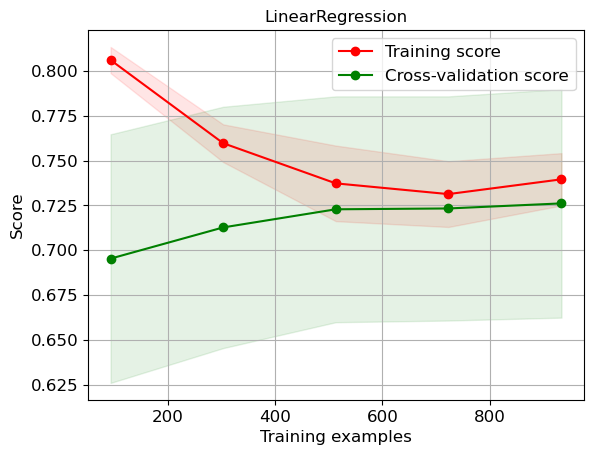

None


In [96]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(x_test)
print(r2_score(y_test,pred)*100)
print(mean_absolute_error(y_test,pred))
mse = mean_squared_error(y_test,pred)
print('RMSE:',np.sqrt(mse))
skplt.estimators.plot_learning_curve(lr,X,y,cv=5,scoring = "r2",text_fontsize = 'large',title = 'LinearRegression')
print(plt.show())

82.69010622573101
22263.394658119658
RMSE : 39142.536400119025


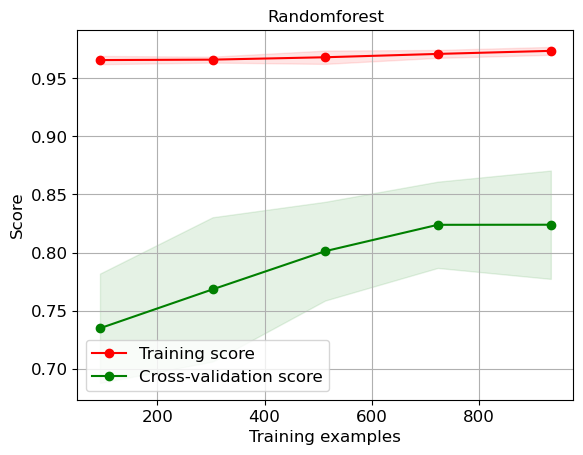

None


In [97]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
pred = rf.predict(x_test)
print(r2_score(y_test,pred)*100)
print(mean_absolute_error(y_test,pred))
mse = mean_squared_error(y_test,pred)
print('RMSE :',np.sqrt(mse))
skplt.estimators.plot_learning_curve(rf,X,y,cv=5,scoring='r2',text_fontsize='large',title='Randomforest')
print(plt.show())


87.51275197127906
20917.86711086499
RMSE : 33245.67321747632


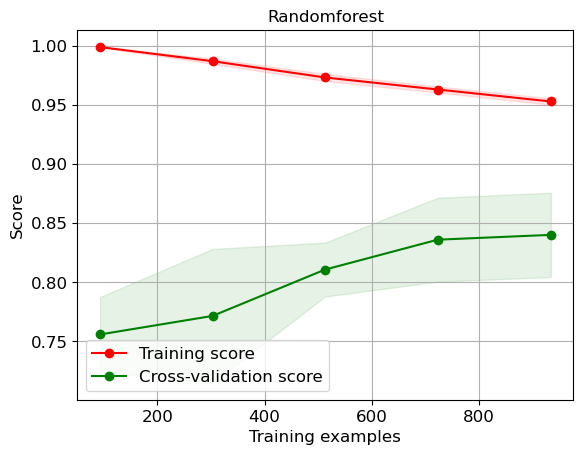

None


In [98]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
gb.fit(x_train,y_train)
pred = gb.predict(x_test)
print(r2_score(y_test,pred)*100)
print(mean_absolute_error(y_test,pred))
mse = mean_squared_error(y_test,pred)
print('RMSE :',np.sqrt(mse))
skplt.estimators.plot_learning_curve(gb,X,y,cv=5,scoring='r2',text_fontsize='large',title='Randomforest')
print(plt.show())

87.24815845489502
21836.74325587607
RMSE : 33596.04905248163


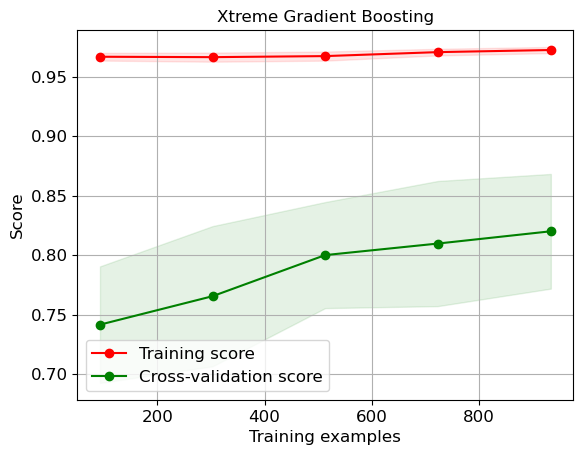

None


In [99]:
from xgboost import XGBRegressor
xgbt =  XGBRegressor()
xgbt.fit(x_train,y_train)
pred = xgbt.predict(x_test)
print(r2_score(y_test,pred)*100)
print(mean_absolute_error(y_test,pred))
mse = mean_squared_error(y_test,pred)
print('RMSE :',np.sqrt(mse))
skplt.estimators.plot_learning_curve(rf,X,y,cv=5,scoring='r2',text_fontsize='large',title='Xtreme Gradient Boosting')
print(plt.show())

#  GradientBoosting Hypertuning GridSearchcv

In [100]:
#gb.estimator_params
gb = GradientBoostingRegressor()
gb.get_params()



{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [101]:
from sklearn.model_selection import GridSearchCV
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state = 186)
params = {'n_estimators':range(100,120,10),
          'min_samples_split':range(2,4),
          'min_samples_leaf':range(1,2,1)}
GCV2 = GridSearchCV(rf,param_grid = params)
GCV2.fit(x_train,y_train)
print('best_pram',GCV2.best_params_)
gb=GCV2.best_estimator_   #reinstalling with best params
gb.fit(x_train,y_train)
y_pred = gb.predict(x_test)
print('\n R2Score ==>','\n',r2_score(y_test,y_pred)*100)
print(mean_absolute_error(y_test,y_pred))
mse = mean_squared_error(y_test,y_pred)
print('RMSE :',np.sqrt(mse))

best_pram {'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 100}

 R2Score ==> 
 85.43007833036191
18104.78763040971
RMSE : 35911.23750432309


In [102]:
import joblib
joblib.dump(GCV2.best_estimator_,'house_price_prediction.pkl')

['house_price_prediction.pkl']

In [103]:
import joblib
joblib.dump(GCV2.best_estimator_,'house_price_prediction.pkl')

['house_price_prediction.pkl']

In [104]:
model = joblib.load("house_price_prediction.pkl")
y_preds = model.predict(x_test)
predicted = pd.DataFrame(y_preds,columns=['predicted'])
predicted

,predicted
0,132287.800000
1,143505.653333
2,221120.435000
3,239919.746048
4,220336.587500
...,...
229,140581.286952
230,173906.504643
231,177178.996667
232,171777.554286


In [106]:
predicted.to_csv("House_price.csv",index=False)

In [109]:
predicted.to_csv("test",index=False)

In [ ]:
import pickle
with open('house_price_prediction.pkl','rb') as f:
    loaded_model = pickle.load(f)
with open('vectorizer_filename.pkl','rb') as f:
    vect_model = pickle.load(f)
    

X = vect_model.transform([sent])
X_dense = X.toarray()
prediction = loaded_model.predict(X_dense)
prediction

In [1]:
!git init

Initialized empty Git repository in D:/jupyterfiles/jupnote/.git/


In [3]:
!git add Enhancing Real Estate Investment Decisions using Predictive Modeling.ipynb

fatal: pathspec 'Enhancing' did not match any files


In [4]:
!git add http://localhost:8888/notebooks/Enhancing%20Real%20Estate%20Investment%20Decisions%20using%20Predictive%20Modeling.ipynb

fatal: pathspec 'http://localhost:8888/notebooks/Enhancing%20Real%20Estate%20Investment%20Decisions%20using%20Predictive%20Modeling.ipynb' did not match any files


In [5]:
!git add EnhancingRealEstateInvestmentDecisionsusingPredictiveModeling.ipynb

In [6]:
! git add "Enhancing Real Estate Investment Decisions using Predictive Modeling.ipynb"